# Tutorial: Cell2Vec - Embedding Cells using Topological Deep Learning


In this tutorial, we explored Cell2Vec, a method for embedding cells in cell or simplicial complexes using topological deep learning. We implemented Cell2Vec using TopoEmbedX and demonstrated the visualization of cell embeddings.


In this tutorial, we will explore Cell2Vec, a method for embedding cells using topological deep learning techniques. Node2Vec is a generalization of the DeepWalk algorithm to cell or simplicial complexes, enabling the generation of meaningful embeddings for cells of varying dimensions (0, 1, or 2) within a topological domain.

### Table of Contents

* Introduction
* Understanding Node2Vec
* Generalizing Node2Vec to Cell2Vec
* Implementation in Python using TopoEmbedX
* Visualization of Cell Embeddings
* Conclusion and Further Steps

## Understanding Node2Vec
Node2Vec is an algorithm used for generating embeddings in graph-structured data, such as social networks or citation networks. It extends the idea of Word2Vec to graphs, aiming to learn low-dimensional vector representations for nodes that preserve the network structure.

The key concept in Node2Vec is the notion of biased random walks. Instead of performing simple random walks, Node2Vec introduces parameters to control the walk behavior. These parameters allow the random walker to balance between exploring the neighborhood locally (BFS-like) and jumping to far-away nodes (DFS-like). This biased random walk strategy helps in capturing the node neighborhood structure effectively.

## Generalizing Node2Vec to Cell2Vec
Cell2Vec extends the principles of Node2Vec to cell or simplicial complexes, where nodes represent cells (vertices, edges, or faces), and edges represent connections between cells. By leveraging biased random walks on the cell complex, Cell2Vec captures the topological structure effectively, enabling the generation of meaningful embeddings for cells.

## Implementation in Python using TopoEmbedX
To implement Cell2Vec, we will utilize the TopoEmbedX library, which provides tools for topological representation learning. We will demonstrate how to use TopoEmbedX to create a model, fit it to a cell complex, and obtain cell embeddings.

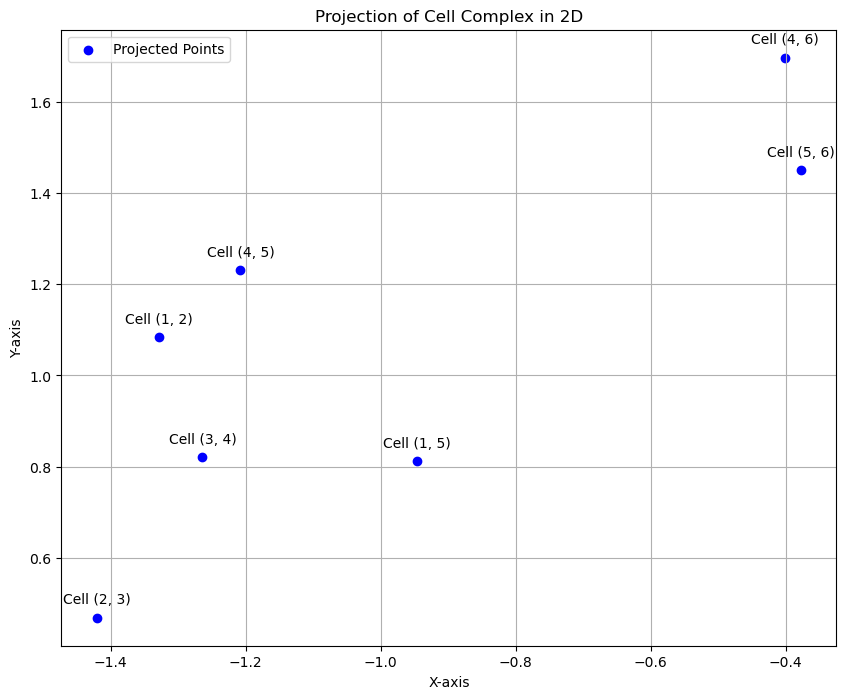

In [69]:
import matplotlib.pyplot as plt
import toponetx as tnx

import topoembedx as tex

# Create a cell complex object with a few cells
cc = tnx.classes.CellComplex([[1, 2, 3, 4, 5], [4, 5, 6]], ranks=2)

# Create a model
model = tex.Cell2Vec(dimensions=2)

# Fit the model to the cell complex

model.fit(cc, neighborhood_type="adj", neighborhood_dim={"rank": 1, "via_rank": -1})

# note that "via_rank" is ignored here and only considered when the complex is Combintatorial complex

# Get the embeddings
embedded_points = model.get_embedding(get_dict=True)


# Prepare data for plotting
x = [embedded_points[cell][0] for cell in embedded_points]
y = [embedded_points[cell][1] for cell in embedded_points]
cell_labels = [f"Cell {cell}" for cell in embedded_points]

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c="blue", label="Projected Points")

# Annotate the points to correspond with cells
for i, label in enumerate(cell_labels):
    plt.annotate(
        label, (x[i], y[i]), textcoords="offset points", xytext=(0, 10), ha="center"
    )

# Label axes and add title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Projection of Cell Complex in 2D")

# Display the plot
plt.legend()
plt.grid(True)
plt.show()

Observe how the edge (4,5) is inbetweeen the edges belonging to the cell (1, 2, 3, 4, 5) whereas the edges (4,5) and (5,6) are isolated on the otherwise. This is because (4,5) is shared between the cells.


Next we explore embedding 2 cells using Cell2Vec:

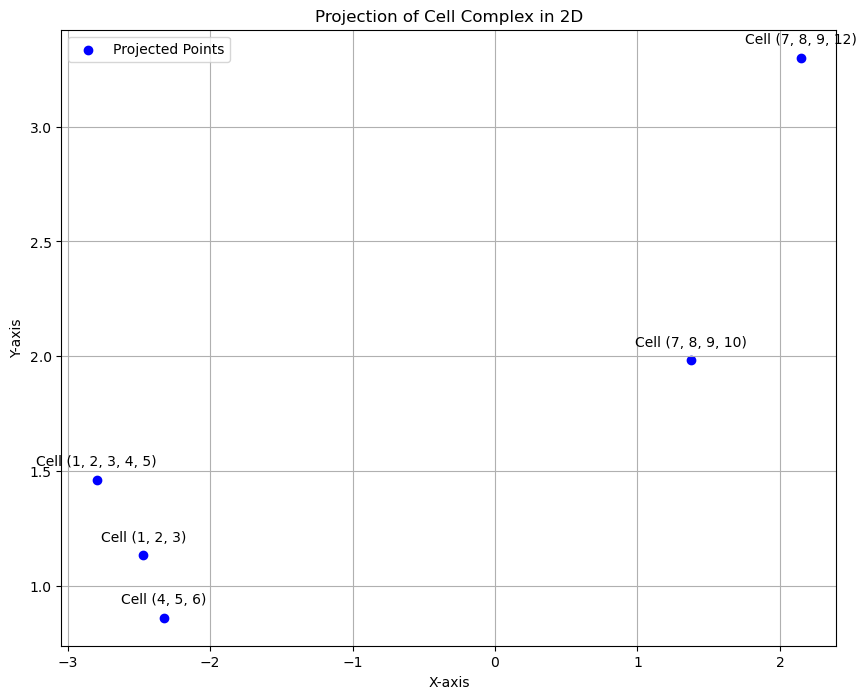

In [86]:
import matplotlib.pyplot as plt
import toponetx as tnx

import topoembedx as tex

# Create a cell complex object with a few cells
cc = tnx.classes.CellComplex(
    [[1, 2, 3], [1, 2, 3, 4, 5], [7, 8, 9, 12], [7, 8, 9, 10], [4, 5, 6]], ranks=2
)

# Create a model
model = tex.Cell2Vec(dimensions=2)

# Fit the model to the cell complex
model.fit(cc, neighborhood_type="coadj", neighborhood_dim={"rank": 2, "via_rank": -1})

# Get the embeddings
embedded_points = model.get_embedding(get_dict=True)


# Prepare data for plotting
x = [embedded_points[cell][0] for cell in embedded_points]
y = [embedded_points[cell][1] for cell in embedded_points]
cell_labels = [f"Cell {cell}" for cell in embedded_points]

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c="blue", label="Projected Points")

# Annotate the points to correspond with cells
for i, label in enumerate(cell_labels):
    plt.annotate(
        label, (x[i], y[i]), textcoords="offset points", xytext=(0, 10), ha="center"
    )

# Label axes and add title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Projection of Cell Complex in 2D")

# Display the plot
plt.legend()
plt.grid(True)
plt.show()

### Refs

(1) Mustafa Hajij,Kyle Istvan,and Ghada Zamzmi, Cell Complex Neural Networks. NeurIPS2020 Workshop TDA and Beyond, 2020.